# Finance Data Project&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Idan Ron

In this data project we will focus on exploratory data analysis of stock prices.
Keep in mind, this project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

**NOTE**: The questions were taken from the "Python for Data-Science" Course by Jose Portilla. all of the code was written by me. <br>
**NOTE2**: Notebook viewer link in the README file.

We'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2016.

## Get the Data

In [9]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

We need to get data using pandas datareader. We will get stock information for the following banks:<br>

Bank of America<br>
CitiGroup<br>
Goldman Sachs<br>
JPMorgan Chase<br>
Morgan Stanley<br>
Wells Fargo<br>

1.Use datetime to set start and end datetime objects.<br>
2.Figure out the ticker symbol for each bank.<br>
3.Figure out how to use datareader to grab info on the stock.

In [3]:
df = pd.read_pickle('all_banks')
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

## EDA

What is the max Close price for each bank's stock throughout the time period?

In [4]:
df.xs(key = 'Close', axis = 1 , level = 'Stock Info').max()


Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [5]:
returns = pd.DataFrame()

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
for tick in tickers:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

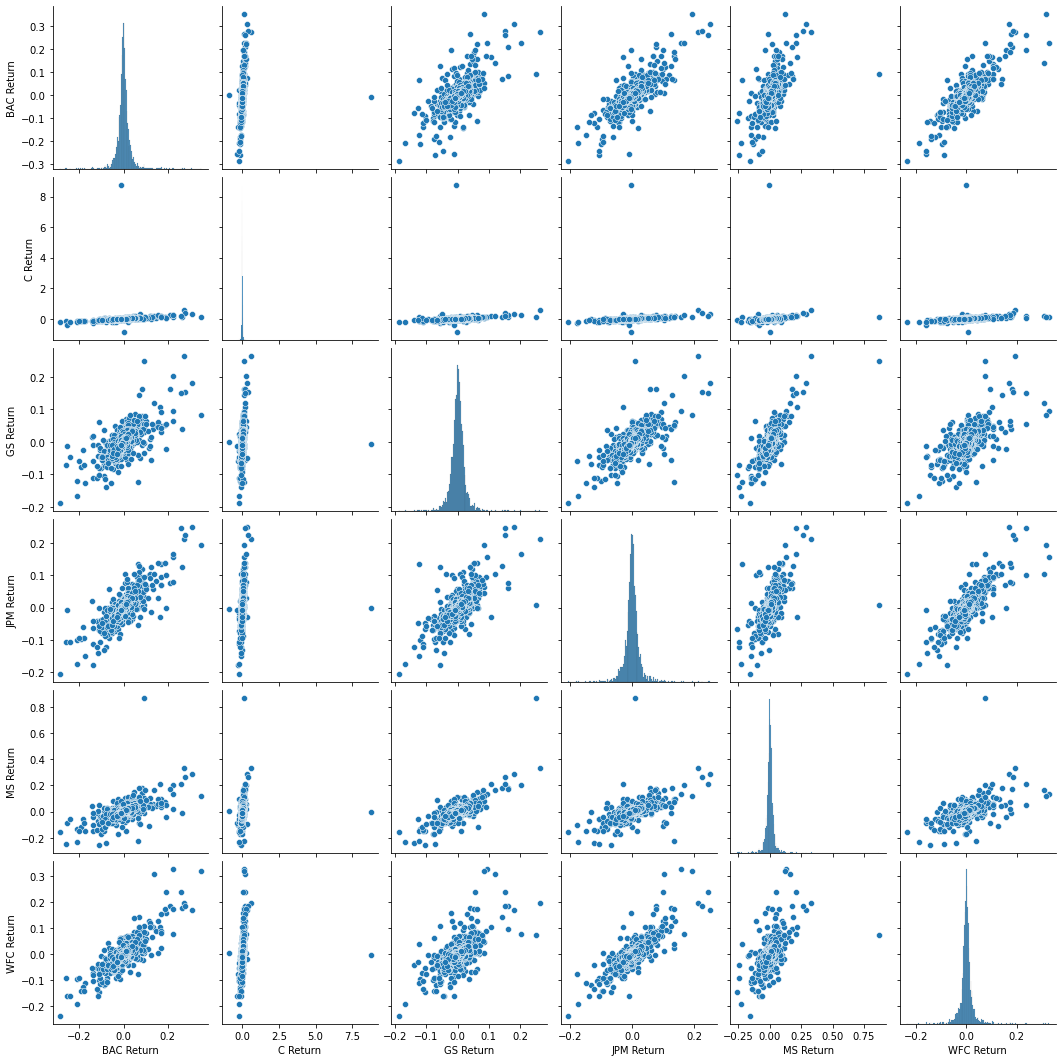

In [8]:
sns.pairplot(returns[1:])

Obviously, we can see a crash is Citigroup's stock

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [12]:
# Worst day

returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

The 2009-01-20 was Obama's inauguration

In [13]:
# Best day

returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [15]:
# All-time standart deviation
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Obviously, I would say that Goldman Sachs is the safest and Citigroup is the riskiest.<br> This is because we can clearly see that Citigroup has the highest standard deviation, indicating greater uncertainty.<br> In finance, greater uncertainty means greater risk.

In [20]:
# For year 2015
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [ ]:
# As we can see, in year 2015 the riskiest of all stocks is Morgan Stanley

Create a distplot using seaborn of the 2015 returns for Morgan Stanley

C:\Users\idand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

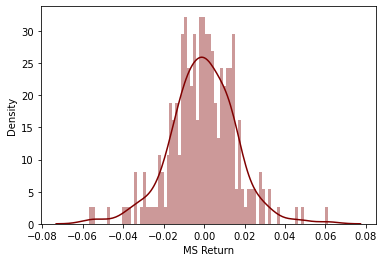

In [33]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'] , bins = 80 , color = 'maroon')

Create a distplot using seaborn of the 2008 returns for CitiGroup

C:\Users\idand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

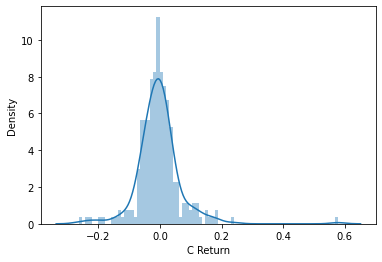

In [37]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins = 80)

# More Visualization
### Imports

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

Create a line plot showing Close price for each bank for the entire index of time.

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.90,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.80,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.20,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.20,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.90,130.39,40.67,59.19,31.68
...,...,...,...,...,...,...
2015-12-24,17.27,52.71,182.47,66.60,32.48,54.82
2015-12-28,17.13,52.38,181.62,66.38,32.17,54.68
2015-12-29,17.28,52.98,183.53,67.07,32.55,55.29


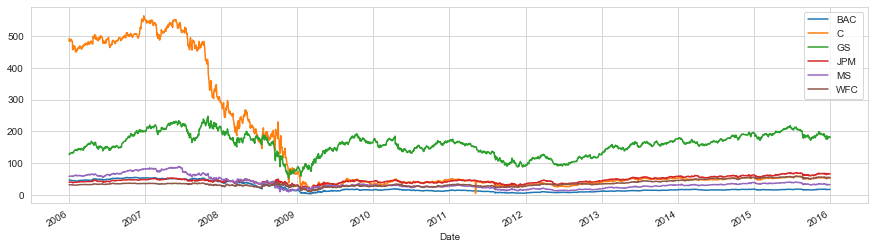

In [67]:
for tick in tickers:
    df[tick]['Close'].plot(figsize=(15,4),label=tick)
plt.legend()

# Another way:
df.xs(key='Close',axis = 1, level='Stock Info')#.plot


## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

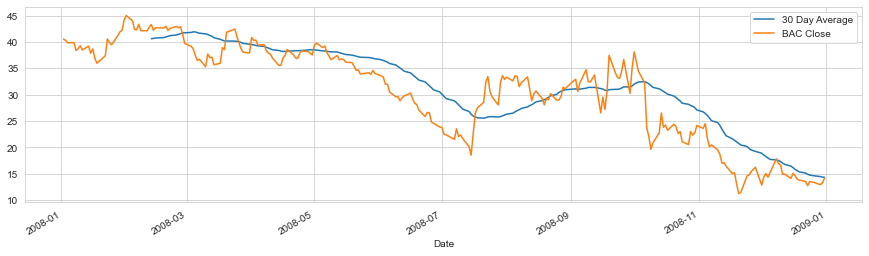

In [75]:
plt.figure(figsize = (15,4))
df.xs(key = 'Close', axis=1,level='Stock Info')['BAC'].loc[:]['2008-01-01':'2008-12-31'].rolling(window = 30).mean().plot(label = '30 Day Average')
df.xs(key = 'Close', axis=1,level='Stock Info')['BAC'].loc[:]['2008-01-01':'2008-12-31'].plot(label = 'BAC Close')
plt.legend()

Create a heatmap of the correlation between the stocks Close Price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

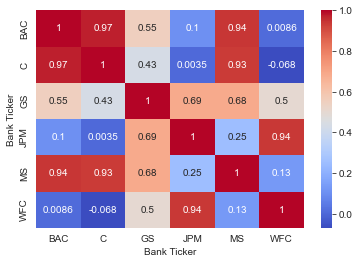

In [84]:
sns.heatmap(df.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),annot = True , cmap = 'coolwarm')

It is worth mentioning that we can see a clear correlation between BAC and C, WFC and JPM, and MS, BAC, and C. This could<br> suggest that they are in mutually dependent sectors or have mutual investments. When one of them goes down due to some event in<br> the world, the others may also be affected.

Optional: Use seaborn's clustermap to cluster the correlations together

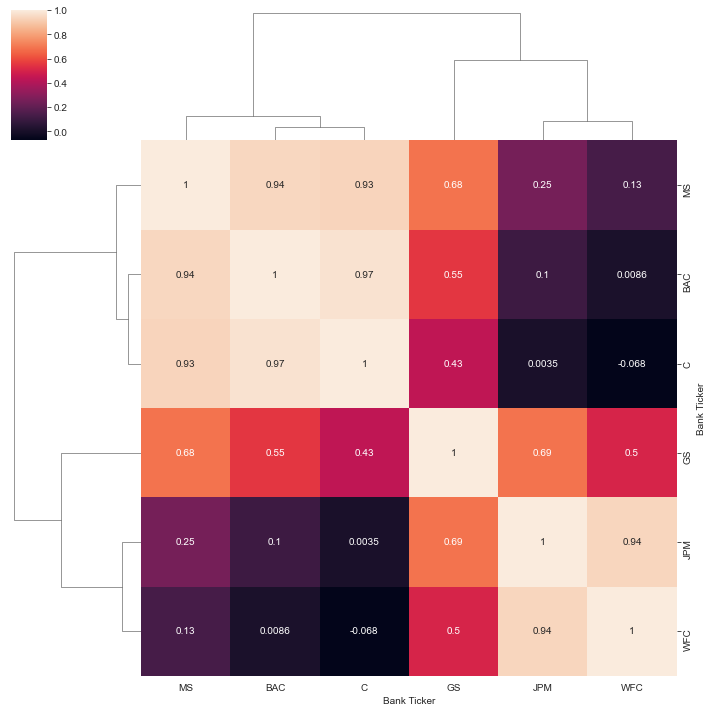

In [86]:
sns.clustermap(df.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),annot = True)

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [95]:
df.loc['2015-01-01':'2016-01-01']['BAC'].iplot(kind = 'candle')

Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [99]:
df.loc['2015-01-01':'2015-12-31']['MS'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015

In [101]:
df.loc['2015-01-01':'2015-12-31']['BAC'].ta_plot(study='boll')

## That is all for this notebook, Thank you for browsing